In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from scipy.integrate import solve_ivp
import torch
from torch import nn
import torch.optim as optim
import torch.nn as nn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

from IPython.display import display, clear_output

from timeit import default_timer as tdt
import torch.nn.init as init

from softadapt import SoftAdapt, NormalizedSoftAdapt, LossWeightedSoftAdapt

if torch.cuda.is_available():
    my_device = 'cpu' # I think I may have broken the cuda version
else:
    my_device = 'cpu'

In [16]:
dataset = pd.read_excel('journal.pone.0248255.s001.xlsx')

In [27]:
dataset['countriesAndTerritories'].unique()

array(['China', 'Italy'], dtype=object)

In [30]:
china = dataset.loc[dataset['countriesAndTerritories'] == 'China']
italy = dataset.loc[dataset['countriesAndTerritories'] == 'Italy']
china

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-02-22,22,2,2020,826,109,China,CN,CHN,1433783692,Asia,2.911457
1,2020-02-21,21,2,2020,891,118,China,CN,CHN,1433783692,Asia,3.092238
2,2020-02-20,20,2,2020,394,112,China,CN,CHN,1433783692,Asia,3.250490
3,2020-02-19,19,2,2020,1750,139,China,CN,CHN,1433783692,Asia,3.482952
4,2020-02-18,18,2,2020,1890,98,China,CN,CHN,1433783692,Asia,3.630952
5,2020-02-17,17,2,2020,2052,105,China,CN,CHN,1433783692,Asia,3.724899
6,2020-02-16,16,2,2020,2007,142,China,CN,CHN,1433783692,Asia,3.777906
7,2020-02-15,15,2,2020,2538,143,China,CN,CHN,1433783692,Asia,3.818568
8,2020-02-14,14,2,2020,4156,13,China,CN,CHN,1433783692,Asia,3.787670
9,2020-02-13,13,2,2020,15141,254,China,CN,CHN,1433783692,Asia,3.635904


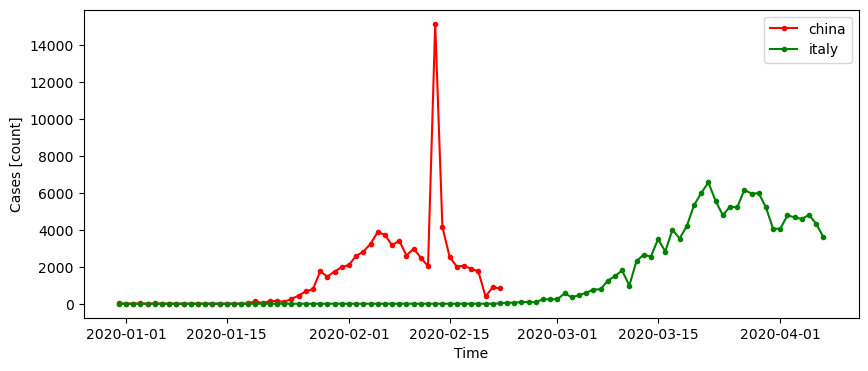

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.plot(china['dateRep'], china['cases'], marker='.', color='red', label='china')
ax.plot(italy['dateRep'], italy['cases'], marker='.', color='green', label='italy')
ax.set_ylabel('Cases [count]')
ax.set_xlabel('Time')
ax.legend()